In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

In [2]:
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=cols)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per $10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

In [3]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


<AxesSubplot:>

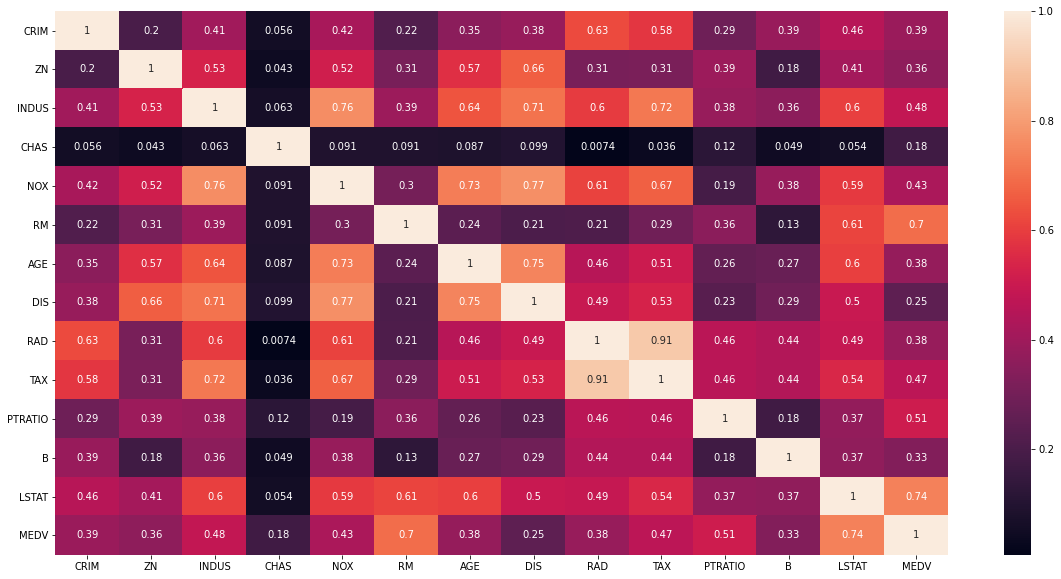

In [11]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr().abs(),  annot=True)

We see that LSTAT, INDUS, RM, TAX, NOX, PTRAIO has high correlation score above 0.5 with MEDV

In [46]:
cols = ['LSTAT', 'INDUS', 'RM', 'TAX', 'NOX', 'PTRATIO']
y = data['MEDV']
x_init = data.loc[:, cols]

# remove the skewness of the data trough log transformation.
y = np.log1p(y)
for col in x_init.columns:
    if np.abs(x_init[col].skew()) > 0.3:
        x_init[col] = np.log1p(x_init[col])

# add 1's in the 0th column of x
x = np.zeros((x_init.shape[0], x_init.shape[1] + 1))
x[:, 0] = 1
x[:, 1:] = x_init

w = np.array([0., 1., 1., 1., 1., 1., 1.])

In [47]:
alpha = 1e-6
max_iter = 1000

for i in range(1, max_iter):
    diff = np.dot(x, w) - y
    cost = 0.5 * np.sum(diff * diff)
    w[0] -= alpha * np.sum(diff)
    for j in range(1, x.shape[1]):
        w[j] -= alpha * np.sum(np.multiply(diff, x[:, j]))
    print(cost)

135993.6865146125
108148.59180094286
86057.42419324287
68530.66301016114
54624.7050406256
43591.02434237863
34835.84258387284
27888.1370128419
22374.26235682419
17997.81931214394
14523.684958149304
11765.34467336669
9574.843011446263
7834.812101386711
6452.14807120238
5352.994787848587
4478.764642952789
3782.9819887628187
3228.7791521933077
2786.9101150264514
2434.174839594404
2152.1693443879085
1926.2941850759728
1744.967919014697
1599.0031756035387
1481.1117158676666
1385.511814439681
1307.616810129849
1243.7880445463707
1191.1388773829358
1147.3792189442427
1110.6922035033685
1079.63635879674
1053.0680006656385
1030.0796715613008
1009.9513060559559
992.1114922188589
976.1067416701845
961.577112624153
948.2368725246062
935.8591584037837
924.2638084878122
913.3077094355666
902.8771391370079
892.8816925155332
883.249463069298
873.9232205442073
864.8573788016729
856.0155905189742
847.3688391330443
838.8939252293501
830.5722658297514
822.3889418917881
814.331942705169
806.3915664797507
7

In [48]:
w

array([-0.18153689,  0.4928224 , -0.05705384,  0.64676617, -0.06130031,
        0.92474364,  0.45638615])